In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy import constants as const
import astropy.units as u

cc = c.to(u.cm / u.s).value
cc_k = c.to(u.km / u.s).value
C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

In [10]:
(1-C_IV_K_A/C_IV_H_A) *cc_k

np.float64(499.727557584245)

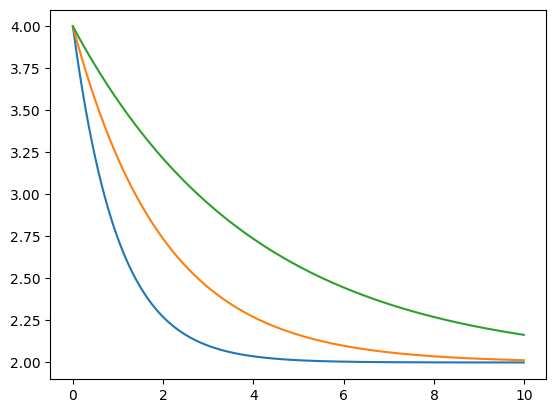

In [2]:
xx = np.arange(0,10,0.01)
yy = 2*(1+np.exp(-xx))
yy_1  = 2*(1+np.exp(-xx/2))
yy_2  = 2*(1+np.exp(-xx/4))
plt.plot(xx,yy)
plt.plot(xx,yy_1)
plt.plot(xx,yy_2)


In [57]:
def Hubble_F_Tau(N,vexp):
    tt = 3.39e13 * (100/11.8)
    # print(tt)
    tau = (N/tt)*(100/vexp)
    return tau

In [151]:
from scipy import special
def eff(fx,vexp,emit):
    a = np.sqrt(2)*emit 
    tt = 2 * (special.erf( (fx) /a ) + special.erf( (vexp)/a ) )
    b_1 = (special.erf( (fx)/a ) + special.erf( (vexp)/a ) )
    b_2 =  2 * (special.erf( (500+(fx))/a ) - special.erf( (500-vexp)/a ) )
    return tt / (b_1 + b_2)

vexp = 1000
tau_H = Hubble_F_Tau(5e12,vexp)

te1 =eff(0,vexp,50)
print(te1 * (1 + np.exp(-tau_H)))
a = np.sqrt(2)*50 
print(special.erf( (500+1500)/a ))

0.7993044402644286
1.0


In [4]:
def eff_1(vexp,emit):
    a = np.sqrt(2)*emit 
    tt = 2 * (special.erf( (vexp)/a ) )
    b_1 = ( special.erf( (vexp)/a ) )
    b_2 =  4 * (-special.erf( (500-vexp)/a ) + special.erf( (500)/a )   )
    return tt / (b_1 + b_2)

te1 =eff_1(0,50)
print(te1*2)

nan


/tmp/ipykernel_4552/1574661204.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return tt / (b_1 + b_2)


In [5]:
def eff_3(v,vexp,emit):
    a = np.sqrt(2)*emit 
    tt = 2 * (special.erf( (v-vexp)/a ) + special.erf( (vexp)/a ) )
    b_1 = ( special.erf( (vexp)/a ) )
    b_2 =  2 * (-special.erf( (500-vexp)/a ) + special.erf( (500)/a )   )
    return tt / (b_1 + b_2)


te1 =eff_3(400,500,50)
print(te1)

0.030333509264238945


In [6]:
vc = 500
v = 0
a = np.sqrt(2)*300
tt = 2 * (1+ special.erf( (v)/a )   )
# print(tt)
b_1 =  (1+ special.erf( (v)/a )   )
# print(b_1)

b_2 =  2 * (special.erf( (500)/a ) -  special.erf( (vc-v)/a )  )
# print(b_2)


print(tt/(b_1+b_2))


2.0


In [7]:
a = np.sqrt(2)*50
vexp = 300
tt = 2*(special.erf((500-vexp)/a)+1)
dd = 3 + 2*special.erf(vexp/a) - special.erf((500-vexp)/a)
print(tt/dd)

0.9999524948760643


In [8]:
def eff_1(vexp,emit):
    a = np.sqrt(2)*emit 
    tt = 2 * (1+ special.erf( (vexp)/a ) )
    b_1 = (1+ special.erf( (vexp)/a ) )
    b_2 =  2 * (-special.erf( (500-vexp)/a ) + special.erf( (500)/a )   )
    return tt / (b_1 + b_2)

vexp = 1000
te1 =eff_1(vexp,50)
print(te1 )

0.6666666666666666


In [9]:
f_CIV_K = 0.190
f_CIV_H = 0.0952
def CIV(T,f_o):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (f_o / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_k, N_CIV_0 = CIV(1e5,f_CIV_K )
print("{:.5e}".format(N_CIV_0))

sig_ly, sig_H, N_CIV_0 = CIV(1e5,f_CIV_H )
print("{:.5e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x
N = 10**16
ratio = (1-np.exp(-tau(sig_k,N))) / (1-np.exp(-tau(sig_H,N))) 
print(ratio)

3.39090e+13
6.76754e+13
1.0
